##Databases Part II

For this last lecutre I am going to query data from the Mimic 3 Demo Database. The Mimic 3 Demo Database is a subset of the original database in that it contians 100 of the original 40,000 patients.  This database contains deidentified health care data of patients from intensive care units at Beth Israel Deaconess Medical Center between 2001 and 2012[1].  The demo database is readily available via this link: [Mimic 3 Demo](https://github.com/MIT-LCP/mimic-code/tree/main/mimic-iii/buildmimic/sqlite).  
Once in this folder read Read.md very carefully.  Download all mimic 3 demo csv files to a specific directory that you have created on your local machine along with the import.py and import.sh.  Now use the instructions in readme fle to create the sqlite database file.
Once you have created the sqlite database locally on your computer upload it to your google drive.

In this lecture I will expand the use of the select statement to build a multitable query to gather data on patient glucose values over time in the ICU.


Now as in the previous lecture go ahead and mount your google drive.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Connect to your database using the path where the database is located on your drive.

In [ ]:
import sqlite3 as sql

conn = sql.connect("/content/drive/MyDrive/data/mimic3.db")

Now I will query the database with a focus on the chartevents table.  This table has clinician charted data that includes measurements such as patient temperature, heart rate and blood pressure. 
Here you will notice I am using the pandas library. Pandas is a python library for data manipulation and analysis.  Here I am using the pandas library to clearly show the tables being used with their column labels.  

Two other concepts I am introducing is an alias and the limit clause.  An alias is a way of shortening a word in this case pandas to something shorter and easier to use or pd.  The limit clause is used here to limit the number of rows returned in the select query in this case to 5 rows.

In [ ]:
import pandas as pd
data = pd.read_sql_query("select * from chartevents limit 5;", conn)
data


,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,None,None
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,None,None


Now I am going to filter the data, but this time I want to query data from three patients.  In this instance I need to use the **in** keyword with **where** so as to query patient data associated with the row_id's 5279021, 5279022 and 5279023.

In [ ]:
df = pd.read_sql_query("select * from chartevents where row_id in (5279021, 5279022, 5279023)", conn)
df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,None,None
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,None,None
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,None,None


Now we are going to start working on building a multitable query in order to visualize patients glucose values during the duration of their stay in the ICU. 

First we need to query the d_items table to find any labels that have the word glucose in it.  Here I am using the **like** operator with a **wildcard %** which in this case is being used before and after the word glucose so as to find any label that has glucose with possible characters at the start or end of the word.

In [ ]:
df = pd.read_sql_query("select * from d_items where label like '%glucose%'", conn)

Now below the distinct keyword is being used within the select statement to allow only unique glucose values to be returned.  Also here I am changing the column name label to Label using the AS keyword.

In [ ]:
df  = pd.read_sql_query("select distinct label AS Label from d_items where label like '%glucose%'", conn)
df

,Label
0,fingerstick glucose
1,Fingerstick Glucose
2,Glucose (70-105)
3,Glucose Monitor #
4,FINGERSTICK GLUCOSE.
5,Blood Glucose
6,BloodGlucose
7,Urine Glucose
8,Glucose
9,abg: glucose


Now using the pandas unique() method we can get the list of all the unique labes to find the appropriate one for the query will be building below.

In [ ]:
print(df.Label.unique())

['fingerstick glucose' 'Fingerstick Glucose' 'Glucose (70-105)'
 'Glucose Monitor #' 'FINGERSTICK GLUCOSE.' 'Blood Glucose' 'BloodGlucose'
 'Urine Glucose' 'Glucose' 'abg: glucose' 'finger stick glucose'
 'Glucose (serum)' 'Glucose finger stick' 'Glucose (whole blood)'
 'Glucose_ApacheIV' 'GlucoseScore_ApacheIV' 'Boost Glucose Control (1/4)'
 'Boost Glucose Control (1/2)' 'Boost Glucose Control (3/4)'
 'Boost Glucose Control (Full)' 'Glucose (whole blood) (soft)']


Now I am going to build a multi table query using an "inner join" which returns records that have matching values in all tables involved.  The tables in this query include chartevents, d_items, icustays and admissions. The chartevents table which as explained previously houses the values for clinician charted glucose data.  D_items includes the labels used for clinician charted data.  The labels column has significance as I am going to use the specific label 'Fingerstick Glucose', found in the list above.  The icustays table contains data such as the location of where the patient is at such as MICU (Medical Intensive Care Unit).  

Another note to mention before running this query would be how the query is built.  In this select query we create an alias for each table such as "chartevents c" as can be seen below. Now instead of using chartevents.icustay_id to select the icustay_id column from chartevents we can use "c.icustay_id" instead.  

To join two tables together as part of an INNER JOIN you join each on their common column name.  As an example, to join both the chartevents and icustays tables together in this manner you use "INNER JOIN chartevents c ON d.itemid = c.itemid" where in this case their common column name is itemid.

I also use the WHERE keyword to filter the data by the patients temperature as well by discharge location such that only discharge location 'DEAD/EXPIRED' is excluded. 

Lastly, I will use "ORDER BY" in order to list the records in ascending order by charted time. 

In [ ]:
query = """select c.subject_id
                    , round((strftime('%s',c.charttime)-strftime('%s',icu.intime))/60.0/60.0) as Number_Of_Hours_In_The_ICU
                    , icu.first_careunit
                    , icu.last_careunit
                    ,  d.label as Accucheck
                    , c.valuenum as Accucheck_Value
                    , a.discharge_location
                 from d_items d
                 inner join chartevents c
                 on d.itemid = c.itemid
                 inner join admissions a
                 on c.subject_id = a.subject_id
                 inner join icustays icu
                 on c.icustay_id = icu.icustay_id
                 WHERE d.label = 'Fingerstick Glucose' AND  a.discharge_location != 'DEAD/EXPIRED'
                 ORDER BY c.charttime
                 """

clinical_data = pd.read_sql_query(query,conn)
clinical_data

,subject_id,Number_Of_Hours_In_The_ICU,first_careunit,last_careunit,Accucheck,Accucheck_Value,discharge_location
0,10088,12.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
1,10088,12.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
2,10088,12.0,MICU,MICU,Fingerstick Glucose,159.0,SNF
3,10088,14.0,MICU,MICU,Fingerstick Glucose,148.0,SNF
4,10088,14.0,MICU,MICU,Fingerstick Glucose,148.0,SNF
...,...,...,...,...,...,...,...
676,10127,507.0,TSICU,TSICU,Fingerstick Glucose,136.0,REHAB/DISTINCT PART HOSP
677,10127,513.0,TSICU,TSICU,Fingerstick Glucose,113.0,REHAB/DISTINCT PART HOSP
678,10127,520.0,TSICU,TSICU,Fingerstick Glucose,118.0,REHAB/DISTINCT PART HOSP
679,10127,525.0,TSICU,TSICU,Fingerstick Glucose,113.0,REHAB/DISTINCT PART HOSP


Now I will plot the glucose values over time for the patients' in icu so we can visualize the trends from admission until the end of the icu stay.  Here I am going to use seaborn to visualize the data.
1. First I will import seaborn and give it the alias sns
2. I will set the font to 2 so it can be easily read.
3. I will use relplot and in the call and use getlabels as the parameter for data, number of hour in the icu from the dataframe for x as well as the accucheck data as valuenum from the dataframe for y.
4. I am going to set the height of the graph to 6.

Text(0.5, 1.0, 'Patients glucose level during the duration of their stay in the ICU.')

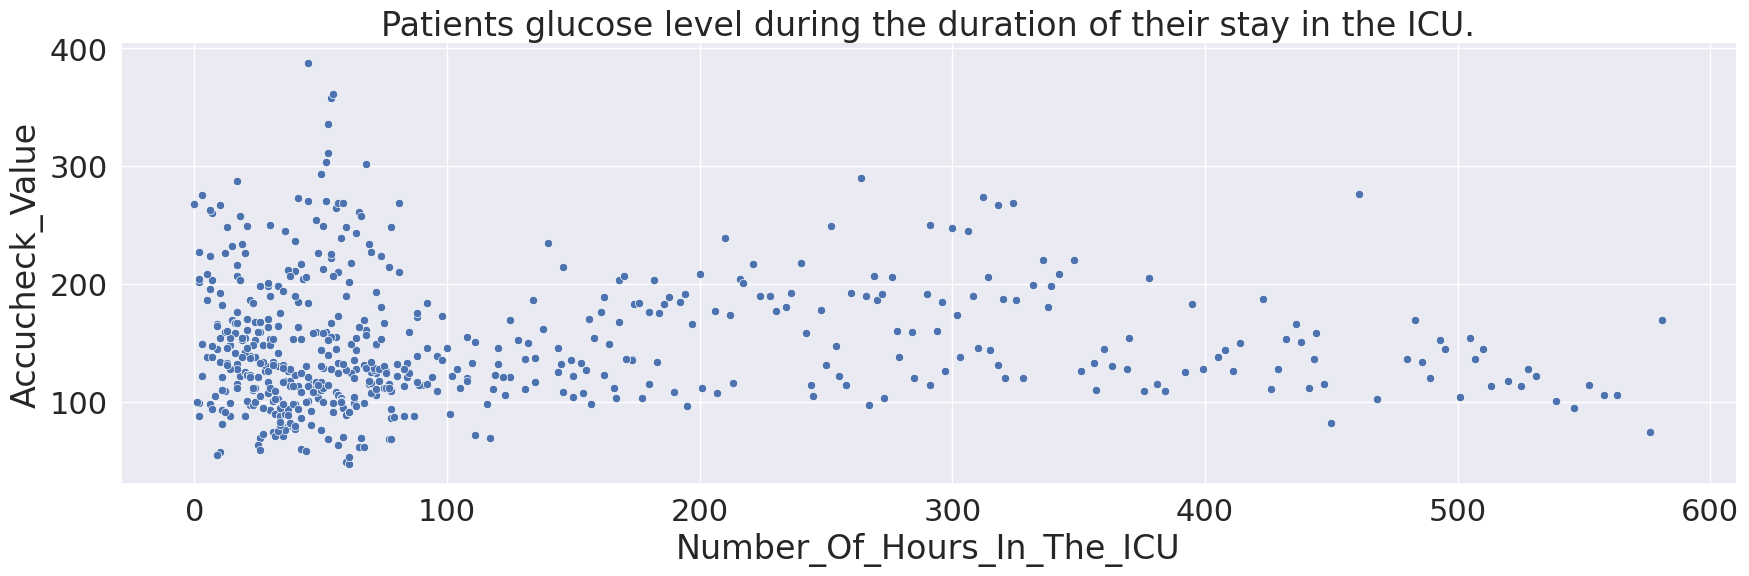

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
sns.relplot(data=clinical_data, x="Number_Of_Hours_In_The_ICU", y="Accucheck_Value", height=6, aspect=3)

plt.title('Patients glucose level during the duration of their stay in the ICU.')

# References

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.